# Plot map to risk factor clusters
## Workflow: to execute after 06_analysis_risk_factor_measures

In [1]:
import pandas as pd
import geopandas as gpd
import geobr
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import pathlib
from util import centimeter_to_inch, get_default_colors_maps

## Loading data

In [2]:
labels_sorted = ['Very low SV', 'Rural with low SV', 'Intermediate SV', 'High SV', "Very high SV"]

In [3]:
df_labeled_risk_factors = pd.read_csv('data/df_labeled_risk_factors.csv', index_col=0)
df_labeled_risk_factors

,CODIGO_MUNICIPIO_6,SIGLA_ESTADO,CODIGO_ESTADO,REGIAO,REGIAO_SAUDE,CODIGO_REGIAO_SAUDE,REGIAO_METROPOLITANA,ESTADO,CODIGO_MUNICIPIO_7,POPULACAO_ESTIMADA,...,NIVEL_TAXA_OBITOS_2020,NIVEL_LABEL_TAXA_OBITOS_2020,NIVEL_TAXA_OBITOS_2021,NIVEL_LABEL_TAXA_OBITOS_2021,NIVEL_TAXA_OBITOS_2022,NIVEL_LABEL_TAXA_OBITOS_2022,componente_principal_1,componente_principal_2,k5,k5_label
5569,530010,DF,53,Centro-Oeste,DISTRITO FEDERAL,53001.0,1.0,Distrito Federal,5300108,3015268,...,0,High,1,Intermediate,5,Low,0.493688,-0.235839,2,Very low SV
3848,355220,SP,35,Sudeste,SOROCABA,35163.0,0.0,São Paulo,3552205,679378,...,2,Intermediate,3,Very high,0,High,0.554712,-0.250728,2,Very low SV
3849,355230,SP,35,Sudeste,LAGOS DO DRS II,35022.0,0.0,São Paulo,3552304,7718,...,1,Low,1,Intermediate,5,Low,0.489724,-0.070913,2,Very low SV
3850,355240,SP,35,Sudeste,REGIAO METROPOLITANA DE CAMPINAS,35072.0,1.0,São Paulo,3552403,282441,...,0,High,2,High,2,Intermediate,0.515029,-0.254067,2,Very low SV
3851,355250,SP,35,Sudeste,ALTO DO TIETE,35011.0,1.0,São Paulo,3552502,297637,...,0,High,2,High,5,Low,0.407419,-0.244740,2,Very low SV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,251240,PB,25,Nordeste,16ª REGIAO,25016.0,0.0,Paraíba,2512408,13680,...,1,Low,0,Very low,1,Very low,-0.371442,0.076947,3,Very high SV
4047,410950,PR,41,Sul,1ª RS PARANAGUA,41001.0,0.0,Paraná,4109500,7636,...,2,Intermediate,1,Intermediate,1,Very low,-0.470157,0.006578,3,Very high SV
1397,251260,PB,25,Nordeste,6ª REGIAO,25006.0,0.0,Paraíba,2512606,1956,...,5,Very low,0,Very low,1,Very low,-0.485774,-0.025340,3,Very high SV
1432,251460,PB,25,Nordeste,6ª REGIAO,25006.0,0.0,Paraíba,2514602,3557,...,0,High,4,Low,1,Very low,-0.450844,-0.042866,3,Very high SV


In [4]:
try:
    filename_map_municipalities = '../covid/data/map_municipalities_2010.geojson'
    path_map_municipalities = pathlib.Path(filename_map_municipalities)
    map_municipalities = gpd.read_file(path_map_municipalities)

    filename_map_states = '../covid/data/map_states_2010.geojson'
    path_map_states = pathlib.Path(filename_map_states)
    map_states = gpd.read_file(path_map_states)
except:
    map_municipalities = geobr.read_municipality(year=2010)
    map_states =  geobr.read_state(year=2010)
    map_municipalities.to_file('../covid/data/map_municipalities_2010.geojson', driver='GeoJSON')
    map_states.to_file('../covid/data/map_states_2010.geojson', driver='GeoJSON')

map_municipalities.code_muni = map_municipalities.code_muni.astype('Int64')
df_map_municipalities = map_municipalities.merge(df_labeled_risk_factors, how="right", left_on="code_muni", right_on="CODIGO_MUNICIPIO_7")

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [5]:
df_map_municipalities

,code_muni,name_muni,code_state,abbrev_state,geometry,CODIGO_MUNICIPIO_6,SIGLA_ESTADO,CODIGO_ESTADO,REGIAO,REGIAO_SAUDE,...,NIVEL_TAXA_OBITOS_2020,NIVEL_LABEL_TAXA_OBITOS_2020,NIVEL_TAXA_OBITOS_2021,NIVEL_LABEL_TAXA_OBITOS_2021,NIVEL_TAXA_OBITOS_2022,NIVEL_LABEL_TAXA_OBITOS_2022,componente_principal_1,componente_principal_2,k5,k5_label
0,5300108,Brasília,53.0,DF,"MULTIPOLYGON (((-48.21763 -15.76267, -48.21321...",530010,DF,53,Centro-Oeste,DISTRITO FEDERAL,...,0,High,1,Intermediate,5,Low,0.493688,-0.235839,2,Very low SV
1,3552205,Sorocaba,35.0,SP,"POLYGON ((-47.55012 -23.50013, -47.55464 -23.4...",355220,SP,35,Sudeste,SOROCABA,...,2,Intermediate,3,Very high,0,High,0.554712,-0.250728,2,Very low SV
2,3552304,Sud Mennucci,35.0,SP,"POLYGON ((-50.88619 -20.55852, -50.88412 -20.5...",355230,SP,35,Sudeste,LAGOS DO DRS II,...,1,Low,1,Intermediate,5,Low,0.489724,-0.070913,2,Very low SV
3,3552403,Sumaré,35.0,SP,"POLYGON ((-47.23223 -22.79103, -47.22966 -22.7...",355240,SP,35,Sudeste,REGIAO METROPOLITANA DE CAMPINAS,...,0,High,2,High,2,Intermediate,0.515029,-0.254067,2,Very low SV
4,3552502,Suzano,35.0,SP,"POLYGON ((-46.27448 -23.48544, -46.26793 -23.4...",355250,SP,35,Sudeste,ALTO DO TIETE,...,0,High,2,High,5,Low,0.407419,-0.244740,2,Very low SV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,2512408,Puxinanã,25.0,PB,"POLYGON ((-36.00900 -7.13885, -35.97949 -7.100...",251240,PB,25,Nordeste,16ª REGIAO,...,1,Low,0,Very low,1,Very low,-0.371442,0.076947,3,Very high SV
5561,4109500,Guaraqueçaba,41.0,PR,"MULTIPOLYGON (((-48.25045 -24.97747, -48.24852...",410950,PR,41,Sul,1ª RS PARANAGUA,...,2,Intermediate,1,Intermediate,1,Very low,-0.470157,0.006578,3,Very high SV
5562,2512606,Quixabá,25.0,PB,"POLYGON ((-37.08698 -7.10913, -37.09642 -7.099...",251260,PB,25,Nordeste,6ª REGIAO,...,5,Very low,0,Very low,1,Very low,-0.485774,-0.025340,3,Very high SV
5563,2514602,São José Do Bonfim,25.0,PB,"POLYGON ((-37.28782 -7.07642, -37.24489 -7.110...",251460,PB,25,Nordeste,6ª REGIAO,...,0,High,4,Low,1,Very low,-0.450844,-0.042866,3,Very high SV


## Ploting map

In [6]:
pontos_customizados = {}

point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
point = Point(point.x, point.y - 2.2)
pontos_customizados['RJ'] = point

point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
point = Point(point.x + 0.6, point.y - 0.8)
pontos_customizados['SC'] = point

point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
point = Point(point.x + 2.1, point.y - 1)
pontos_customizados['ES'] = point

point = map_states[map_states.abbrev_state == 'SE'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1.5)
pontos_customizados['SE'] = point

point = map_states[map_states.abbrev_state == 'AL'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1)
pontos_customizados['AL'] = point

point = map_states[map_states.abbrev_state == 'PE'].geometry.centroid.values[0]
point = Point(point.x + 4.1, point.y - 0.7)
pontos_customizados['PE'] = point

point = map_states[map_states.abbrev_state == 'PB'].geometry.centroid.values[0]
point = Point(point.x + 3.1, point.y - 0.5)
pontos_customizados['PB'] = point

point = map_states[map_states.abbrev_state == 'RN'].geometry.centroid.values[0]
point = Point(point.x + 2.8, point.y)
pontos_customizados['RN'] = point

point = map_states[map_states.abbrev_state == 'PI'].geometry.centroid.values[0]
point = Point(point.x + 1, point.y)
pontos_customizados['PI'] = point

point = map_states[map_states.abbrev_state == 'DF'].geometry.centroid.values[0]
point = Point(point.x, point.y + 0.35)
pontos_customizados['DF'] = point

point = map_states[map_states.abbrev_state == 'GO'].geometry.centroid.values[0]
point = Point(point.x, point.y - 1.4)
pontos_customizados['GO'] = point

point = map_states[map_states.abbrev_state == 'AC'].geometry.centroid.values[0]
point = Point(point.x, point.y - 0.4)
pontos_customizados['AC'] = point

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/array.py:546: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


In [7]:
def replace_legend_items(legend, sorted_labels):
    for txt in legend.texts:
        for i in range(len(sorted_labels)):
            if txt.get_text() == str(i):
                txt.set_text(sorted_labels[i])

def plot_mapa_clusters(df, column, analysis='general'):
    for i in range(len(labels_sorted)):
        label = labels_sorted[i]
        df.loc[df[column] == label, 'order_cluster'] = str(i)

    linewidth_estados = 0.4
    # linewidth_municipios = linewidth_estados * 0.000001
    linewidth_municipios = 0

    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(centimeter_to_inch(17.4), centimeter_to_inch(17.4)))

    df.plot(
        column='order_cluster',
        legend=True,
        cmap=get_default_colors_maps(5),
        legend_kwds={'loc': 'lower left', 'ncol': 1, 'bbox_to_anchor': (-0.075, 0)},
        edgecolor="gray",
        linewidth=linewidth_municipios,
        categorical=True,
        ax=ax
    )

    map_states.boundary.plot(edgecolor="black", linewidth=linewidth_estados, ax=ax)

    map_states[map_states.abbrev_state.isin(['RJ', 'SC', 'ES', 'SE', 'AL', 'PE', 'PB', 'RN', 'DF', 'GO', 'PI', 'AC']) == False].apply(lambda x: ax.annotate(text=x.abbrev_state, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

    for ponto in pontos_customizados.keys():
        ax.text(pontos_customizados[ponto].x, pontos_customizados[ponto].y, ponto, ha='center')

    ax.axis("off")

    replace_legend_items(ax.get_legend(), labels_sorted)    
    fig.savefig('images/map_risk_factors_'+analysis+'.png', bbox_inches="tight")
    fig.savefig('images/map_risk_factors_'+analysis+'.pdf', bbox_inches="tight")
    plt.show()

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/array.py:386: ShapelyDeprecationWarning: __len__ for multi-part geometries is de

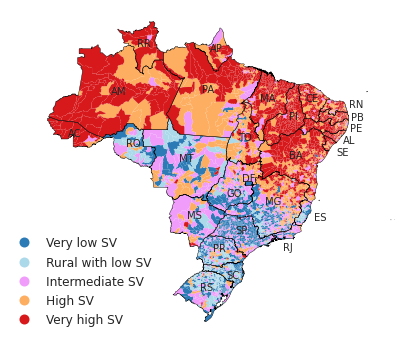

In [8]:
plot_mapa_clusters(df_map_municipalities, 'k5_label')

/home/helder/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/helder/anacond

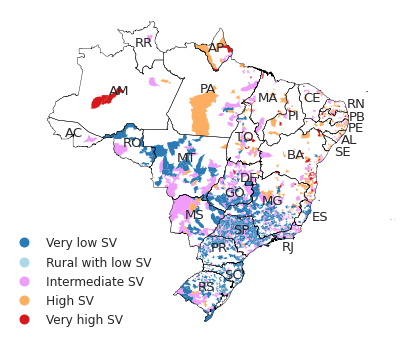

In [11]:
plot_mapa_clusters(df_map_municipalities[df_map_municipalities.PERCENTUAL_POPULACAO_URBANA > 75], 'k5_label', analysis='especific')

/home/helder/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/helder/anacond

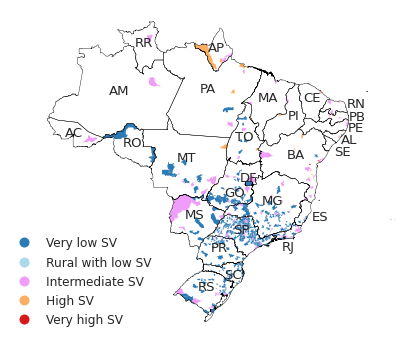

In [9]:
plot_mapa_clusters(df_map_municipalities[df_map_municipalities.PERCENTUAL_POPULACAO_URBANA > 90], 'k5_label', analysis='especific')

/home/helder/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/helder/anacond

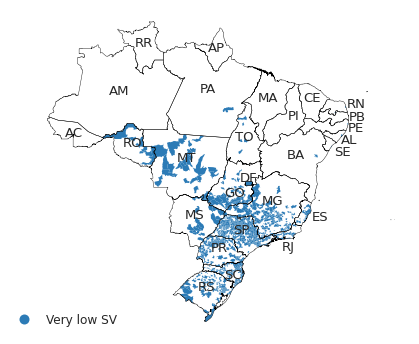

In [10]:
plot_mapa_clusters(df_map_municipalities[df_map_municipalities.k5_label == 'Very low SV'], 'k5_label', analysis='especific')

In [13]:
len(df_map_municipalities[df_map_municipalities.PERCENTUAL_POPULACAO_URBANA > 75])

2023

In [14]:
len(df_map_municipalities[df_map_municipalities.POPULACAO_2022 > 100000])

319

In [17]:
len(df_map_municipalities[df_map_municipalities.REGIAO_METROPOLITANA==1])

386

In [19]:
len(df_map_municipalities[df_map_municipalities.k5_label=='Very low SV'])

1176

In [21]:
len(df_map_municipalities[(df_map_municipalities.k5_label=='Very low SV') |(df_map_municipalities.k5_label=='Intermediate SV')])

2124